In [ ]:
!pip install --upgrade google-api-python-client
!pip install google-cloud-vision
!pip install keras-ocr
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!pip install pytesseract

In [ ]:
!sudo apt install tesseract-ocr-kor

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2
import pytesseract
from pytesseract import Output
import keras_ocr
import os
import io

# 목차

* 평가기준
* 가상 서비스 기획
* 검증용 데이터셋 준비
* 구글 OCR API
* keras-ocr
* Tesseract
* 3가지 api에 대한 결과
* 결론


# 평가기준 

아래의 기준을 바탕으로 프로젝트를 평가합니다.

-----

평가문항	상세기준

1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?

> 기획한 서비스가 OCR 적용 가능한 서비스이며, OCR 기술을 활용했을 때 더 유용한지에 대한 타당성 여부를 기술하였다.

2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?

> 앞서 기획한 서비스에서 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시하고, 평가기준에 적합한 테스트 데이터의 특징이 무엇인지 설명하였다.

3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?

> 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.

# 가상 서비스 기획

오늘날에는 전자책이 점점 볼 수 있는 책의 종류도 많아지고 읽기에도 좋은 환경이 되었으며 가격 또한 종이책에 비해 저렴하게 많은 책을 읽을 수 있는 구독 서비스 또한 확대되고 있다. 이에 따라서 각종 전자책 업체에서는 더 다양한 책들을 전자책으로 보유하는 것이 중요한 요소가 되었으며, 일반 사용자들도 자신이 가진 종이문서 혹은 사진, 그림 등의 텍스트를 쉽게 문자열 데이터로 만들고자 하는 경우가 늘어났다.

나는 이를 위해 ocr을 활용하여 책이나 이미지에 있는 텍스트를 추출하여 문자열로 저장하는 서비스를 만들고자 한다. 이 때 언어에 관계없이 (최소한 영어와 한국어가 모두 가능해야한다) 사용이 가능하도록 하고싶다. 또한 책을 사진으로 찍을 때 텍스트가 정방향이 아니더라도 (어느 정도 회전이 되어있어도) 정확도가 높은 api를 찾고자한다. 그렇게 해야 많은 사용자들에게 대중적으로 사용될 수 있기 때문이다. 마찬가지의 이유로 텍스트의 글꼴이나 이미지 화질이 낮더라도 작동해야한다. 책의 경우, 요즘 나온 책 뿐만 아니라 오래되어 상태가 나빠진 고서들에 사용할 수 있어야하기 때문이다.

즉, 이번 기획에서는 가능한 한 다양한 환경 하에서 모두 무리없이 사진 또는 이미지 속에 있는 텍스트를 뽑아낼 수 있도록 하는 것이 가장 중요하다고 할 수 있겠다.

# 검증용 데이터셋 준비



In [27]:
input_images = '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_imgs'
outputs = '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs'

In [28]:
img_list = os.listdir(input_images)
img_list = sorted(img_list)
img_list

['01.jpg',
 '02.jpg',
 '03.jpg',
 '04.jpg',
 '05.jpg',
 '06.jpg',
 '07.jpg',
 '08.jpg',
 '09.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg']

# 구글 OCR API

In [29]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [30]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# !ls -l $GOOGLE_APPLICATION_CREDENTIALS
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/propane-tribute-368304-2a5e7083cbb4.json'

for img in img_list:
    print(f'[{img}]')
    detect_text(os.path.join(input_images, img))
    print()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
"want"

"no"

"more"

"troubles"

"with"

"occupied"

"bathrooms"
bounds: (309,516),(391,516),(391,533),(309,533)

[02.jpg]
Texts:

"8.6 반사에 의한 편광
편광된 빛을 만드는 가장 보편적인 방법은 유전체 매질에서
의 반사이다. 반질반질한 유리창, 매끄러운 종이, 대머리, 전
화기 표면, 당구공, 책 커버에서 반사되는 빛은 일반적으로
부분편광되어 있다.
말뤼스는 1808년에 이러한 효과를 최초로 연구하였다. 그 당"

"8.6"

"반사"

"에"

"의한"

"편광"

"편광"

"된"

"빛"

"을"

"만드는"

"가장"

"보편적"

"인"

"방법"

"은"

"유전체"

"매질"

"에서"

"의"

"반사"

"이다"

"."

"반질"

"반질"

"한"

"유리창"

","

"매끄러운"

"종이"

","

"대머리"

","

"전"

"화기"

"표면"

","

"당구"

"공"

","

"책"

"커버"

"에서"

"반사"

"되는"

"빛"

"은"

"일반적"

"으로"

"부분"

"편광"

"되어"

"있다"

"."

"말"

"뤼스"

"는"

"1808"

"년"

"에"

"이러한"

"효과"

"를"

"최초로"

"연구"

"하였다"

"."

"그"

"당"
bounds: (1312,795),(1344,794),(1346,861),(1314,862)

[03.jpg]
Texts:

"'만약 우리가 이 순간을 망친다면 다음에 다시 시도하면 돼
또 실패한다면 그 다음에 다시 시도하면 돼.
그것이 성공을 위한 우리의 삶일 거야"
미셸 공드리 <무드인디고>"

"'"

"만약"

"우리"

"가"

"이"

"순간"

"을"

"망친다"

"면"

"다음"

"에"

"다시"

"시도"

"하면"

"돼"

"또"

"실패"

"한다면"

"그"

"

# keras-ocr

In [31]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [32]:
images = [keras_ocr.tools.read(os.path.join(input_images, img)) for img in img_list]
prediction_groups = [pipeline.recognize([os.path.join(input_images, img)]) for img in img_list]

2/2 [==============================] - 7s 620ms/step


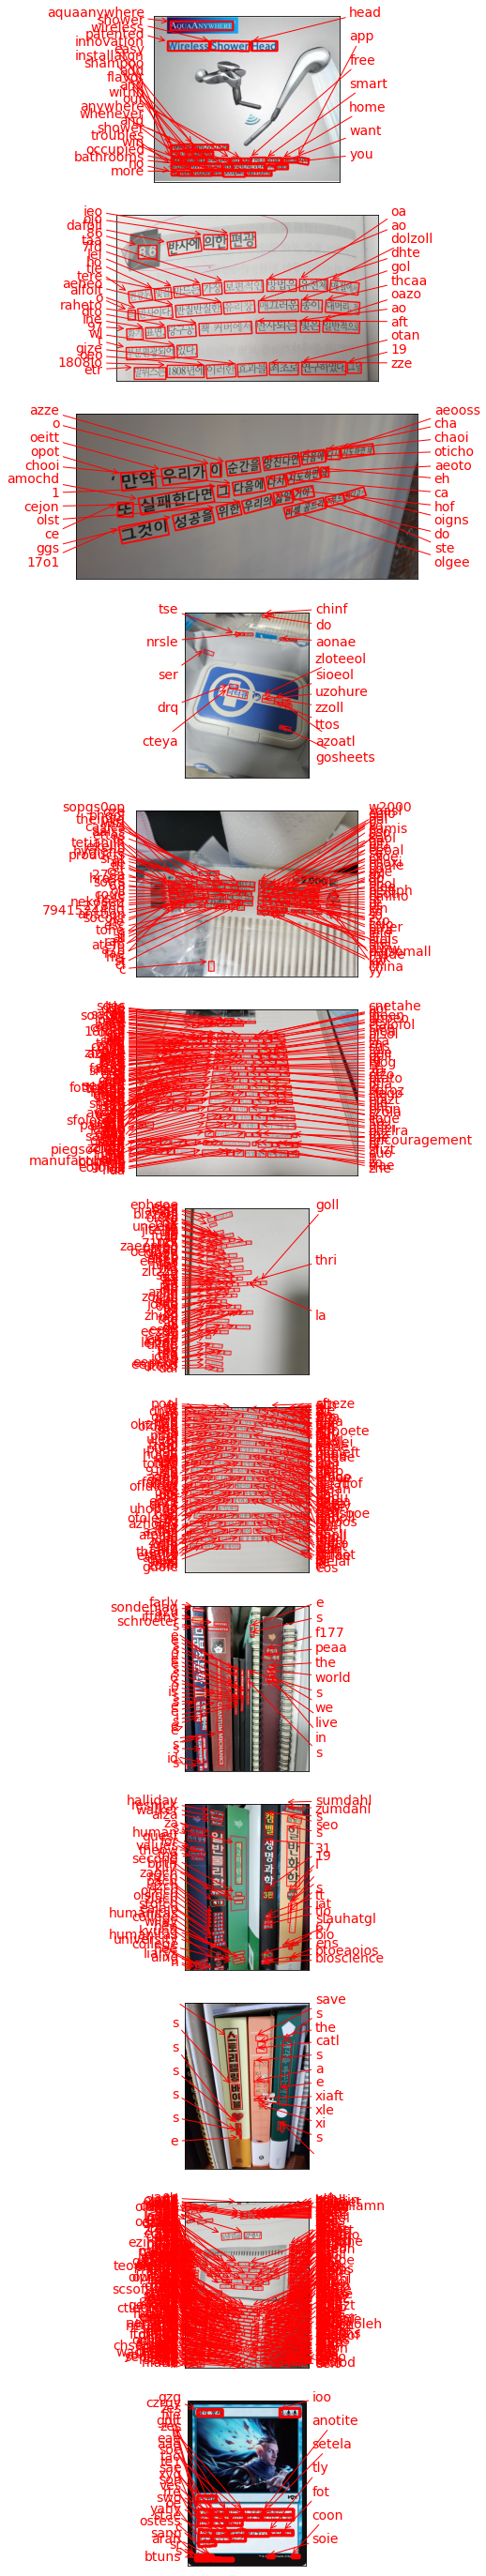

In [35]:
fig, axs = plt.subplots(nrows=len(images), figsize=(50, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# Tesseract

테서랙트로 문자 검출하고 이미지 자르기 (detection)

In [41]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 영어라면 lang='eng'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [43]:
save_dir = '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs'

for img in img_list:
    input = os.path.join(input_images, img)
    try:
      cropped_image_path_list = crop_word_regions(input, save_dir)
    except:
      print('no_kor')

/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0000.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0001.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0002.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0003.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0004.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0005.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0006.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0007.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0008.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0009.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0010.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0011.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0012.png
/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0013.png
/content/drive/MyDrive/아이펠 데ᄋ

테서랙트로 잘린 이미지에서 단어 인식하기

In [47]:
cropped_image_path_list

['/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0000.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0001.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0002.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0003.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0004.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0005.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0006.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0007.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0008.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0009.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0010.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0011.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/ocr_outputs/0012.png',
 '/content/drive/MyDrive/아이펠 데이터/exp15_ocr/o

In [49]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 영어라면 lang='eng'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

년 본  ： 기

-



,

：


】

(까

ㄴ [

|

/ 호

네

별

가바 아. 이 1

Done


# 3가지 api에 대한 결과

구글 OCR API 는 텍스트를 그대로 문자열로 추출하여 내보냈다. 이 때 전체 원문을 먼저 가져오고 이후 별개로 형태소에 따라 다시 분해한 결과를 다시 냈다.

keras-ocr 은 아래 사진처럼 사진에서 텍스트의 위치와 그 내용을 함께 내보냈다. 그 덕분에 해당 문자가 어디에 존재하는지 직관적으로 알 수 있었다.

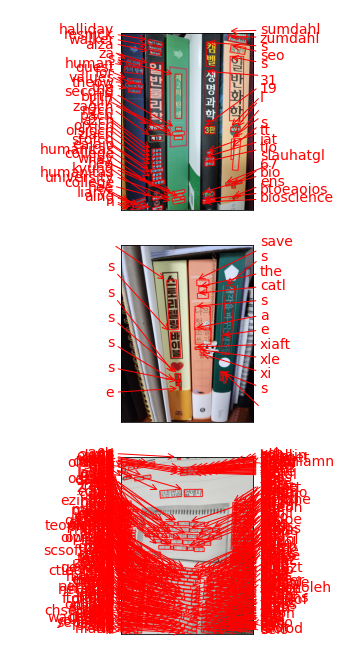


마지막으로 Tesseract는 아래 사진처럼 입력된 이미지에서 텍스트가 있는 부분을 전부 따로 잘라내어 저장한 후 그것을 읽어내는 방식으로 작동했다. 

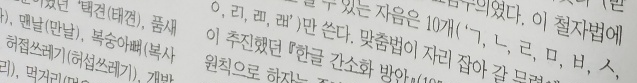

# 결론

keras-ocr은 텍스트 추출과 함께 그 위치도 이미지 위에 표현하지만 서비스 목적과는 거리가 먼 기능이다. 영어는 꽤 좋은 결과를 내는 반면 한국어가 제대로 작동하지 않는다는 점은 치명적인 단점이므로 이번 서비스에서 사용할 수가 없다. 그리고 책처럼 텍스트가 매우 많을 경우 추출된 텍스트에 뒤덥히며 알아볼 수 없게 된다는 점 또한 문제였다.

Tesseract의 경우 이미지를 직사각형으로 자른다는 점이 문제였다. 텍스트가 기울어져 있을 경우 제대로 추출하지 못 했으며, 책의 경우 너무 많이 자르게 되어 시간도 오래 걸렸다. 그럼에도 불구하고 추출된 텍스트의 정확도가 너무 낮아서 사용할 수 없는 지경이었다.

구글 OCR API는 아주 높은 정확도로 원하는 텍스트를 추출할 수 있었다. 다양한 언어와 환경에서도 문제 없이 작동하였으며 문자열 데이터를 바로 내보내므로 서비스의 목적에 부합했다. 그리고 이렇게 추출한 문자를 다시 형태소로 쪼개준다는 특징이 있었는데, 이는 자동 번역 서비스를 할 때 아주 큰 도움이 된다. 모르는 언어로 쓰여진 책이라도 사진을 찍어 이 서비스를 사용하면 문자추출과 함께 바로 번역을 할 수 있도록 단어들을 나누는 것이다.

따라서 앞의 두 API는 우리의 서비스에서 사용하기엔 큰 결함이 있었기 때문에 부적합하며, 구글 OCR API는 목적에 완전히 부합하고 거기에 추가적인 기능도 지원할 수 있는 가능성을 제공하기 때문에 이것을 쓰는 것이 바람직하다고 할 수 있겠다.

# 회고

이번 노드에서는 다양한 OCR API들을 직접 사용해보며 장단점과 특징들을 살펴보았다. 특히 서비스를 만드는 입장이 되어 이것들을 고려하는 것은 이전의 노드들과는 전혀 다른 부분이었다.

아쉬운 점이 있다면 구글 OCR API가 너무나도 성능이 좋았기 때문에 큰 고민을 하지 않아도 된다는 점이었는데 그럼에도 불구하고 서비스의 목적이 어떻게 달랐다면 다른 API를 쓰는 것이 나은 상황이었을까 고민해보게 되었다. 특히 teras-ocr은 텍스트의 위치를 표현하므로 매우 큰 이미지 내에서 산발적으로 퍼져있는 텍스트들을 추출해야한다면 가장 적합한 API가 되었을 것이다.